![](../img/330-banner.png)

# Tutorial 6

UBC 2025-26

## Outline

During this tutorial, you will practice clustering and interpretation of clustering results.

All questions can be discussed with your classmates and the TAs - this is not a graded exercise!

In [26]:
import os
import random
import sys
import time

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sys.path.append(os.path.join(os.path.abspath(".."), "code"))

import mglearn
#plt.style.use("seaborn")

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler


## The dataset

👻 It's Halloween 👻!

Therefore, we will work with a new dataset including information about different types of popular Halloween candy. You can download the dataset from [Kaggle](https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking). We also recommend taking a moment to read the Attribute Information included in this page, which will explain how the data was collected and the features included in the dataset.

This tutorial was inspired by the [Halloween Candy Data Visualizations](https://github.com/dkhundley/halloween-candy-visualizations/blob/main/notebooks/halloween-candy-visualizations.ipynb) notebook by  David Hundley (particularly the two dataset visualization that we are going to use)

Use the cell below to read the dataset and check the first few rows (make sure the path matches the location on your computer).

In [27]:
candy_df = pd.read_csv("candy-data.csv")
candy_df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## EDA

Let's start with familiarizing with the dataset and see if we can start identifying possible groups of similar candy. You may use familiar functions to do so (`describe()`), as well as the summary plots provided below.

In [28]:
candy_df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


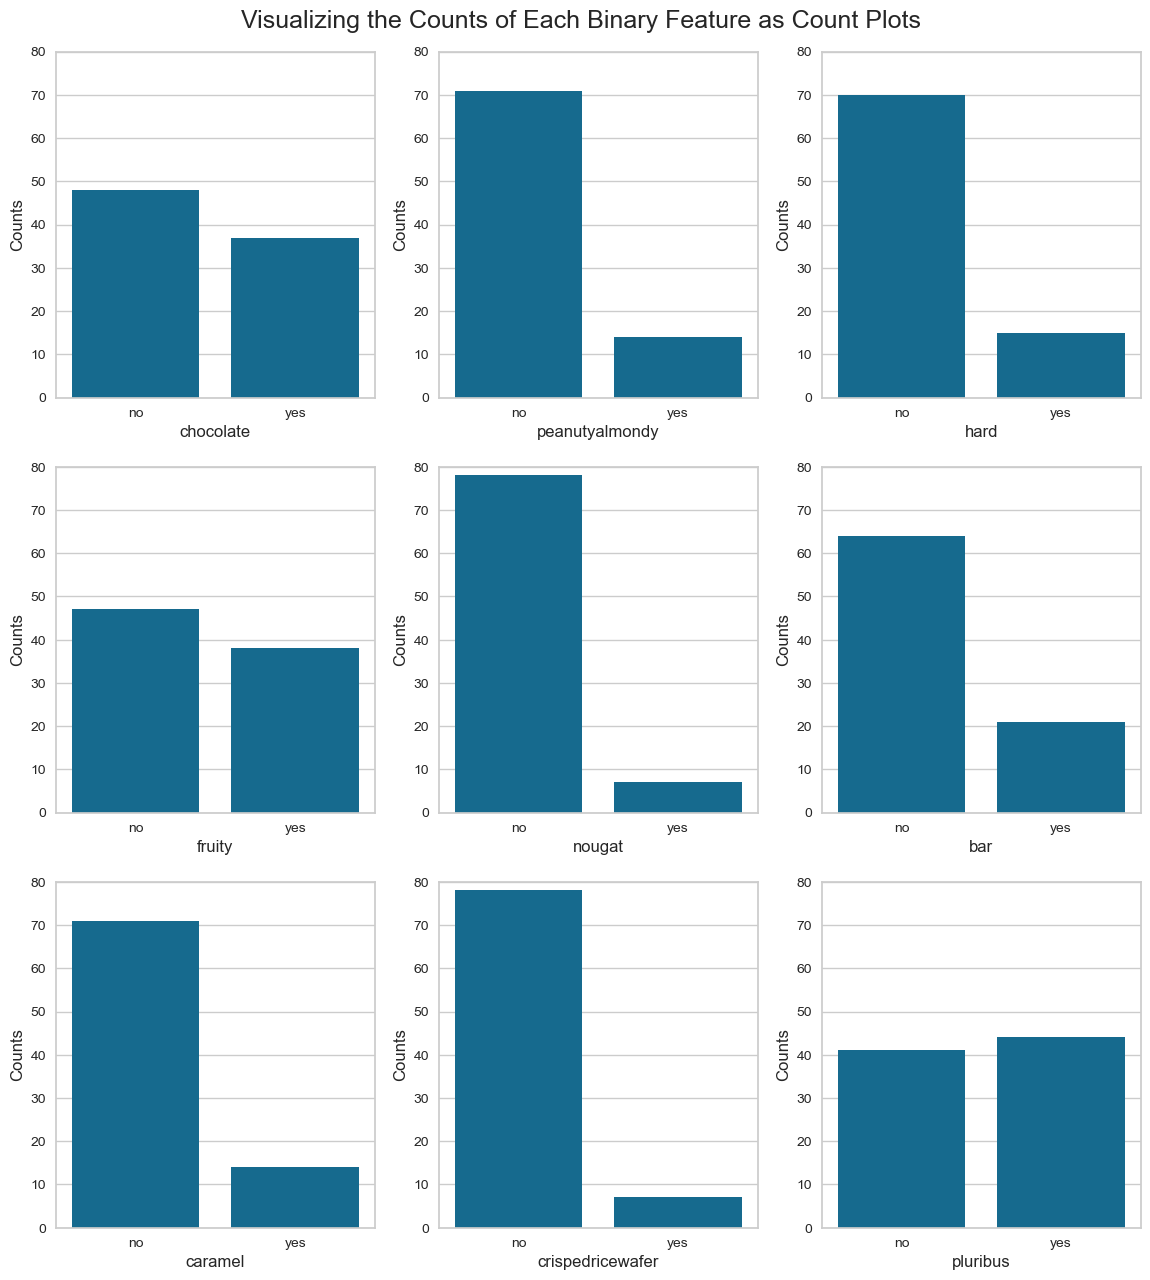

In [32]:
# From https://github.com/dkhundley/halloween-candy-visualizations/blob/main/notebooks/halloween-candy-visualizations.ipynb

# Establishing a 3x3 grid to place all our countplots
figure, axes = plt.subplots(3, 3, figsize = (14, 14))

# Establishing x- and y-coordinate values
x_coord, y_coord = 0, 0

df_binary = candy_df.select_dtypes(int)
df_binary = df_binary.replace({0: 'no', 1: 'yes'})

# Displaying all countplots for each variable appropriately
for feature in df_binary.columns:
    
    # Displaying the countplot for the respective feature
    countplot = sb.countplot(x = df_binary[feature], order = ['no', 'yes'], ax = axes[x_coord, y_coord]);
    
    # Adjusting the y-value limit
    countplot.set_ylim(0, 80)
    
    # Setting the x- and y-label name and font-size
    countplot.set_ylabel('Counts', fontsize = 12)
    countplot.set_xlabel(feature, fontsize = 12)
    
    # Incrementing the coordinate values
    x_coord += 1
    if x_coord == 3:
        y_coord += 1
        x_coord = 0
        
# Adding title to the holistic visualization
figure.suptitle('Visualizing the Counts of Each Binary Feature as Count Plots', fontsize = 18);
figure.subplots_adjust(top = .95)

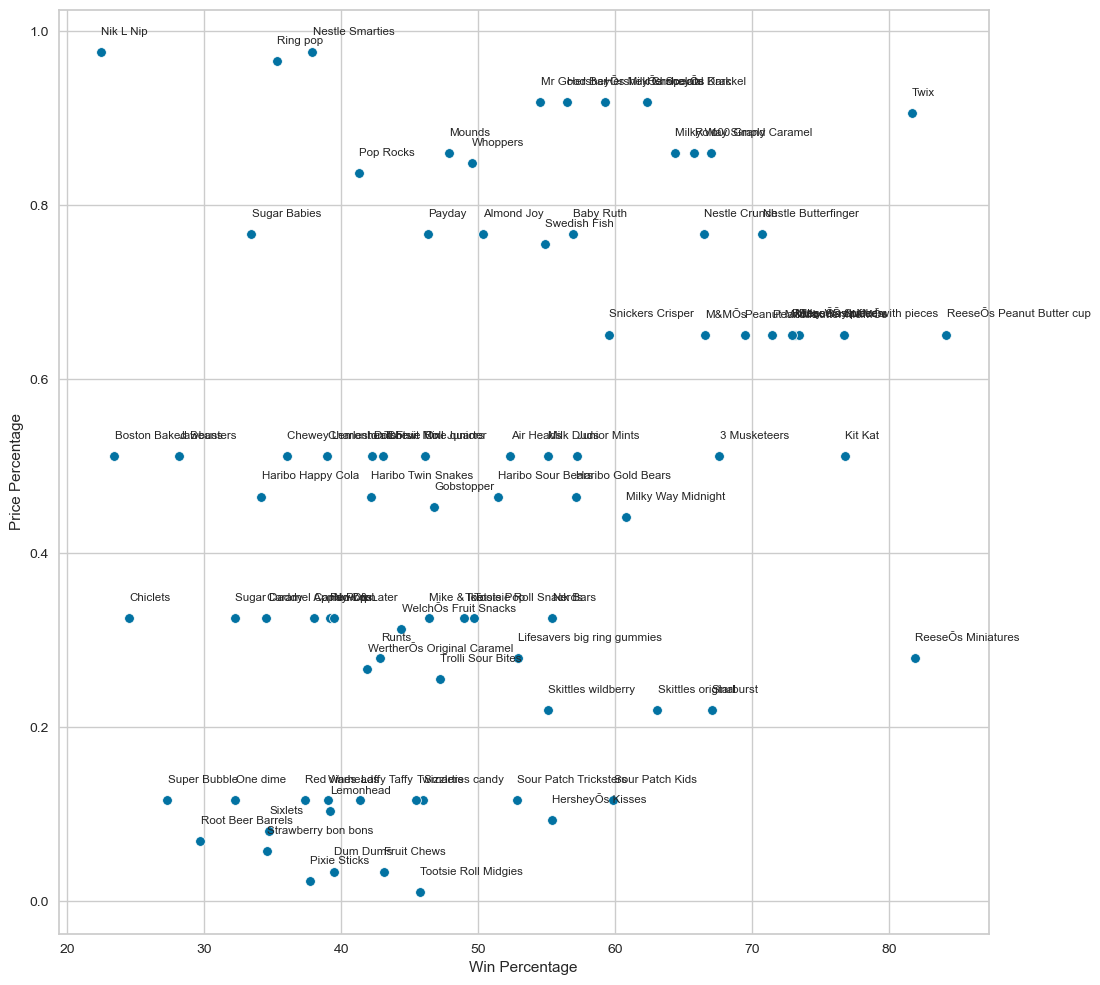

In [36]:
# From https://github.com/dkhundley/halloween-candy-visualizations/blob/main/notebooks/halloween-candy-visualizations.ipynb

# Establishing a 2x1 grid to place both our scatter plots
plt.figure(figsize=(12, 12)) 

# Creating scatter plot visualization
scatterplot = sb.scatterplot(data = candy_df, x = 'winpercent', y = 'pricepercent');
    
    
# Iterating through each candy to add its respective label to the scatter plot
for i, candy in enumerate(list(candy_df['competitorname'])):
        
    # Plotting each candy label appropriately
    scatterplot.text(x = candy_df['winpercent'][i] + 0.02, y = candy_df['pricepercent'][i] + 0.02,
                     s = candy, fontsize = 'x-small')
    
# Setting the location of the legend and axis labels
scatterplot.set(xlabel = 'Win Percentage', ylabel = 'Price Percentage')
    
# Adding title to the holistic visualization
figure.suptitle('Visualizing the Relationship between Price and Wins', fontsize = 16);
figure.subplots_adjust(top = .95)

Based on this information, do you think some type of candy will be likely to cluster together?

## Preprocessing

We will use K-Means to cluster this dataset, which as you know is sensitive to feature scales. The dataset requires some basic preprocessing to ensure that all features are in comparable ranges. 

In [4]:
to_scale = ["sugarpercent", "pricepercent", "winpercent"]
drop = ["competitorname"]

passthrough = list(
    set(candy_df.columns)
    - set(to_scale)
    - set(drop)
)

ct = make_column_transformer(
    (StandardScaler(), to_scale),
    ("passthrough", passthrough),  # no transformations on the binary features    
    ("drop", drop),  
)

In [37]:
column_names = (
    to_scale
    + passthrough
)

In [6]:
candy_transformed = ct.fit_transform(candy_df)

pd.DataFrame(candy_transformed, columns=column_names)

,sugarpercent,pricepercent,winpercent,bar,peanutyalmondy,fruity,caramel,crispedricewafer,hard,pluribus,nougat,chocolate
0,0.901261,1.376914,1.138603,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.445922,0.148273,1.181755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,-1.663576,-1.242308,-1.234361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.663576,0.148273,-0.287147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.520236,0.148273,0.138417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,-0.920093,-1.242308,-0.331599,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81,-1.371875,-1.242308,-0.772848,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
82,-0.589262,-0.548778,-0.406168,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
83,-1.041043,-0.710719,-0.575111,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Clustering with K-Means

Now that the dataset has been processed, let's cluster it using K-Means. Helping yourself with the cells below, complete the following steps:
- Use the elbow method to determine the appropriate number of clusters
- Use the Silhouette Method to evaluate the resulting clusters (you may want to try a couple of neighbouring values around the one found using the elbow method)
- Assign cluster labels to the original dataframe (before preprocessing)
- Describe the resulting clusters; to do this, you may check the `cluster_centers_`, compute means (or medians) for each feature grouped by cluster, or try some other visualization.

What do you think of theresulting clusters? Do they match your prediction?

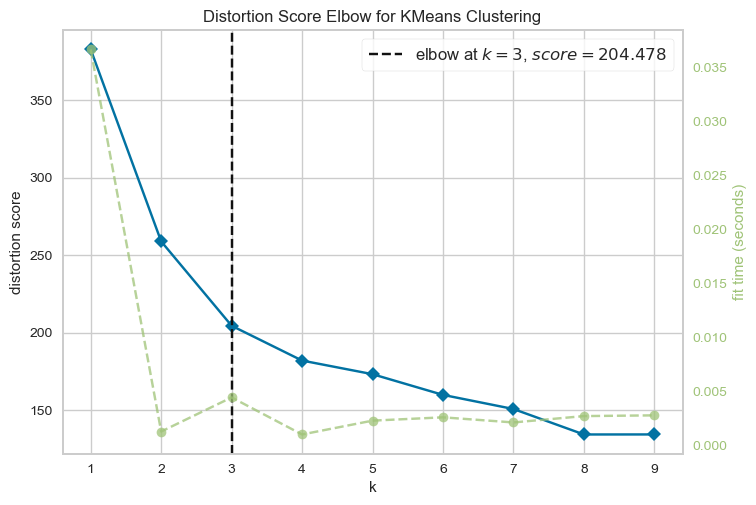

In [7]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1, 10))

visualizer.fit(candy_transformed)  # Fit the data to the visualizer
visualizer.show();

The elbow method suggests 3 as the best number of clusters, although other values could be explored.

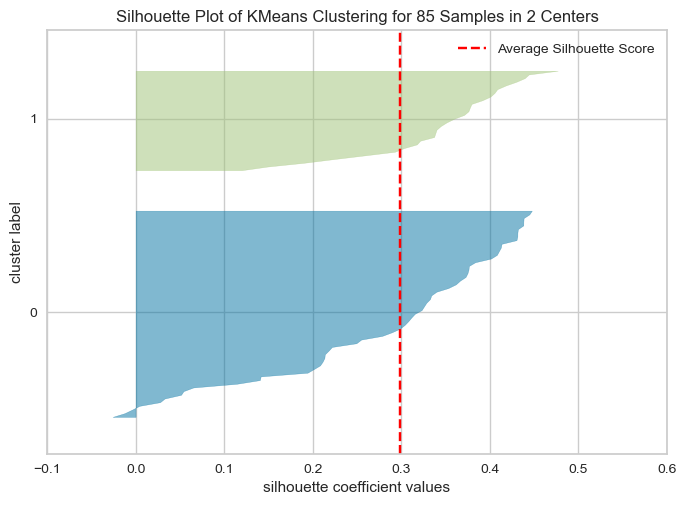

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(2, n_init='auto', random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(candy_transformed)  # Fit the data to the visualizer
visualizer.show();

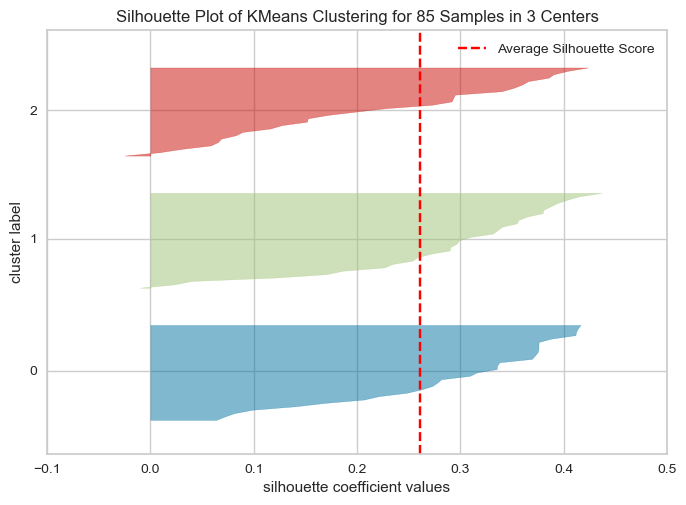

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, n_init='auto', random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(candy_transformed)  # Fit the data to the visualizer
visualizer.show();

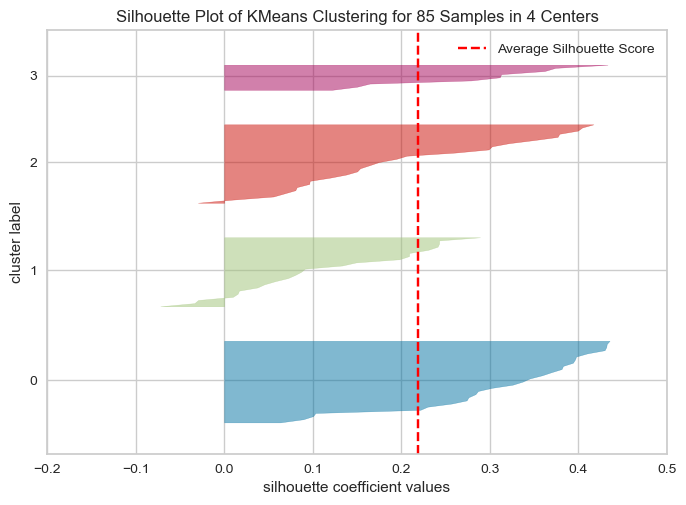

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, n_init='auto', random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(candy_transformed)  # Fit the data to the visualizer
visualizer.show();

Based on the Silhouette scores, k = 2 and k = 3 are promising number of clusters to explore. More than that and it appears that candies are ending up in the wrong cluster.

In [38]:
# Final fit and assignment of cluster labels

kmeans = KMeans(n_clusters=3, random_state=42)

candy_df['cluster'] = kmeans.fit_predict(candy_transformed)

In [39]:
# Evaluating cluster centroids

kmeans.cluster_centers_

centers_df = pd.DataFrame(
    kmeans.cluster_centers_,    # center coordinates
    columns=column_names        # same columns as input features
).reset_index().rename(columns={'index': 'cluster'})

print("\nCluster Centers:")
print(centers_df)


Cluster Centers:
   cluster  sugarpercent  pricepercent  winpercent       bar  peanutyalmondy  \
0        0     -1.027304     -0.804072   -0.488000  0.034483    3.448276e-02   
1        1      0.309394      0.932365    0.972208  0.655172    4.482759e-01   
2        2      0.771089     -0.137796   -0.520076  0.037037    2.775558e-17   

         fruity   caramel  crispedricewafer          hard  pluribus    nougat  \
0  5.517241e-01  0.103448      0.000000e+00  1.724138e-01  0.586207  0.000000   
1 -1.110223e-16  0.310345      2.413793e-01  2.775558e-17  0.241379  0.206897   
2  8.148148e-01  0.074074      1.387779e-17  3.703704e-01  0.740741  0.037037   

   chocolate  
0   0.241379  
1   0.965517  
2   0.074074  


In [40]:
# Cluster feature averages (convenient because in the original scale)

cluster_summary = candy_df.groupby('cluster').mean(numeric_only=True)
print(cluster_summary)

         chocolate    fruity   caramel  peanutyalmondy    nougat  \
cluster                                                            
0         0.241379  0.551724  0.103448        0.034483  0.000000   
1         0.965517  0.000000  0.310345        0.448276  0.206897   
2         0.074074  0.814815  0.074074        0.000000  0.037037   

         crispedricewafer      hard       bar  pluribus  sugarpercent  \
cluster                                                                 
0                0.000000  0.172414  0.034483  0.586207      0.189862   
1                0.241379  0.000000  0.655172  0.241379      0.565621   
2                0.000000  0.370370  0.037037  0.740741      0.695407   

         pricepercent  winpercent  
cluster                            
0            0.240483   43.178529  
1            0.733724   64.537778  
2            0.429741   42.709334  


In [45]:
# Get 3 random samples from each cluster
samples = candy_df.groupby('cluster').sample(n=3, random_state=123)[['competitorname', 'cluster']]

print(samples)

                competitorname  cluster
27                Junior Mints        0
83  WertherÕs Original Caramel        0
22            HersheyÕs Kisses        0
47                 Peanut M&Ms        1
39                      Mounds        1
46                      Payday        1
69         Strawberry bon bons        2
74                 Tootsie Pop        2
4                    Air Heads        2


Based on the results, we may describe the resulting clusters as follows:
- Cluster 1 is the most distinct and includes mostly **chocolate candy bars**, possibly with a peanut/almond flavour. These candy comes in individual wrappers. They are among the most expensive and most popular.
- Cluster 0 and 2 are more similar, but we can estimate that cluster 2 includes mostly fruity candy. They also tend to be more sugary, slightly more pricey, and come in small packets with multiple candy. Cluster 0 is a bit more mixed (it often happens in clustering to have a "others" group), but seems to include the least sugary candy. These clusters are similar in popularity.